In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [16]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
gende_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [17]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [18]:
gende_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [19]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


/tmp/ipykernel_36/2105818389.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=train_df, ci=None, palette='viridis')


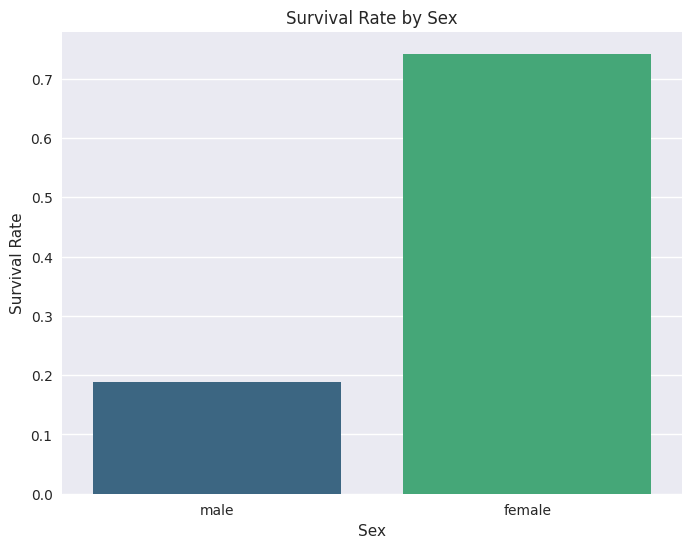

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train_df, ci=None, palette='viridis')
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


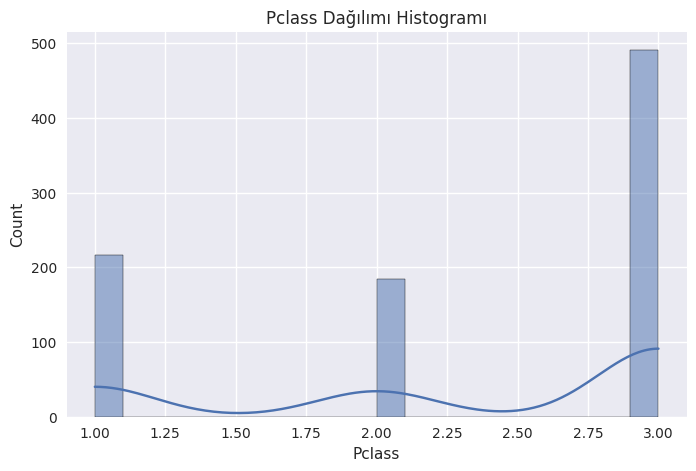

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


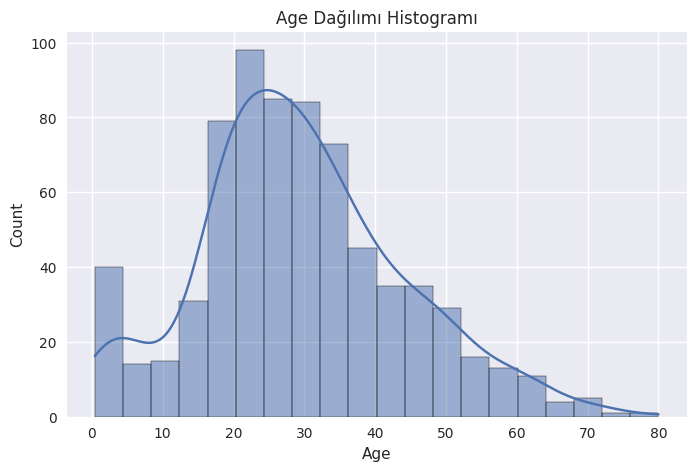

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


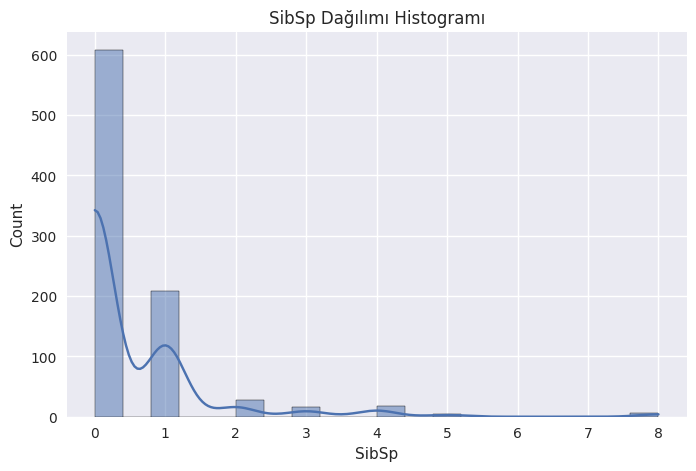

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


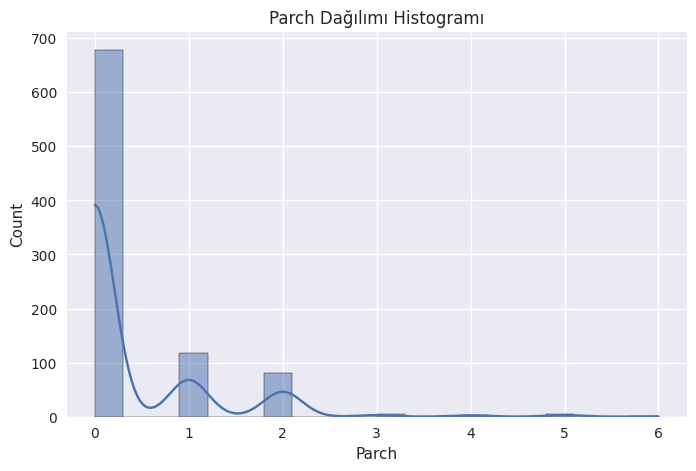

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


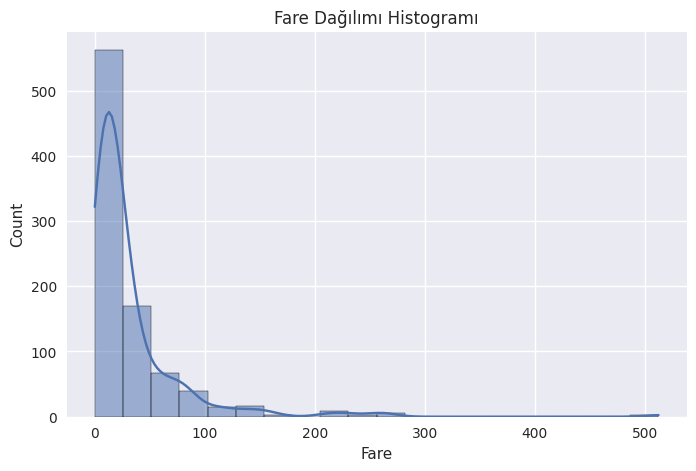

In [21]:
for sutun in ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    plt.figure(figsize=(8, 5))
    sns.histplot(train_df[sutun], bins=20, kde=True)
    plt.xlabel(sutun)
    plt.title(f'{sutun} Dağılımı Histogramı')
    plt.show()

In [22]:
corr = train_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']].corr()
corr

,Pclass,Age,SibSp,Parch,Fare,Survived
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.338481
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.077221
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.035322
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225,0.081629
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000,0.257307
Survived,-0.338481,-0.077221,-0.035322,0.081629,0.257307,1.000000


In [23]:
live_famale = train_df[(train_df['Survived'] == 1) & (train_df['Sex'] == 'female')].shape[0]
number_of_famale = train_df[(train_df['Sex'] == 'female')].shape[0]
number_of_male = train_df[(train_df['Sex'] == 'male')].shape[0]
live_male = train_df[(train_df['Survived'] == 1) & (train_df['Sex'] == 'male')].shape[0]

per_live_famale = live_famale / number_of_famale
per_live_male = live_male / number_of_male

print(live_famale/ number_of_famale, live_male/ number_of_male)

0.7420382165605095 0.18890814558058924


In [24]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
train_df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
test_df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

In [26]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
test_df[test_df['Pclass'] == 3]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
5,897,3,male,14.0,0,0,9.2250,S
...,...,...,...,...,...,...,...,...
412,1304,3,female,28.0,0,0,7.7750,S
413,1305,3,male,NaN,0,0,8.0500,S
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [28]:
male_mean = train_df[train_df['Sex'] == 'male']['Age'].mean()
female_mean = train_df[train_df['Sex'] == 'female']['Age'].mean()
print(male_mean, female_mean)

30.72664459161148 27.915708812260537


In [29]:
male_mean_t = test_df[test_df['Sex'] == 'male']['Age'].mean()
female_mean_t = test_df[test_df['Sex'] == 'female']['Age'].mean()

fare_3_mean = test_df[test_df['Pclass'] == 3]['Fare'].mean()
print(fare_3_mean)

12.459677880184334


In [30]:
train_df.loc[(train_df['Sex'] == 'male') & (train_df['Age'].isna()), 'Age'] = male_mean
train_df.loc[(train_df['Sex'] == 'female') & (train_df['Age'].isna()), 'Age'] = female_mean

In [31]:
test_df.loc[(test_df['Sex'] == 'male') & (test_df['Age'].isna()), 'Age'] = male_mean_t
test_df.loc[(test_df['Sex'] == 'female') & (test_df['Age'].isna()), 'Age'] = female_mean_t

test_df.loc[(test_df['Pclass'] == 3) & (test_df['Fare'].isna()), 'Fare'] = fare_3_mean

In [32]:
train_df.dropna(subset=['Embarked'], inplace=True)
test_df.dropna(subset=['Embarked'], inplace=True)

In [33]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [34]:
gende_df[gende_df['Survived'] == 1].shape[0]

152

In [35]:
gende_df[gende_df['Survived'] == 0].shape[0]

266

In [36]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,27.915709,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [37]:
columns_to_encode = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']

train_df_encoded = pd.get_dummies(train_df[columns_to_encode], drop_first=True)
test_df_encoded = pd.get_dummies(test_df[columns_to_encode], drop_first=True)

train_df = pd.concat([train_df.drop(columns=columns_to_encode), train_df_encoded], axis=1)
test_df = pd.concat([test_df.drop(columns=columns_to_encode), test_df_encoded], axis=1)

In [38]:
train_df

,PassengerId,Survived,Age,Fare,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,1,0,22.000000,7.2500,3,1,0,True,False,True
1,2,1,38.000000,71.2833,1,1,0,False,False,False
2,3,1,26.000000,7.9250,3,0,0,False,False,True
3,4,1,35.000000,53.1000,1,1,0,False,False,True
4,5,0,35.000000,8.0500,3,0,0,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.000000,13.0000,2,0,0,True,False,True
887,888,1,19.000000,30.0000,1,0,0,False,False,True
888,889,0,27.915709,23.4500,3,1,2,False,False,True
889,890,1,26.000000,30.0000,1,0,0,True,False,False


/tmp/ipykernel_36/3439515928.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = train_df.groupby('AgeGroup')['Survived'].mean()
/tmp/ipykernel_36/3439515928.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=train_df, ci=None, order=['Baby', 'Child', 'Teenager', 'Adult', 'OldAdult', 'Old'], palette='viridis')
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


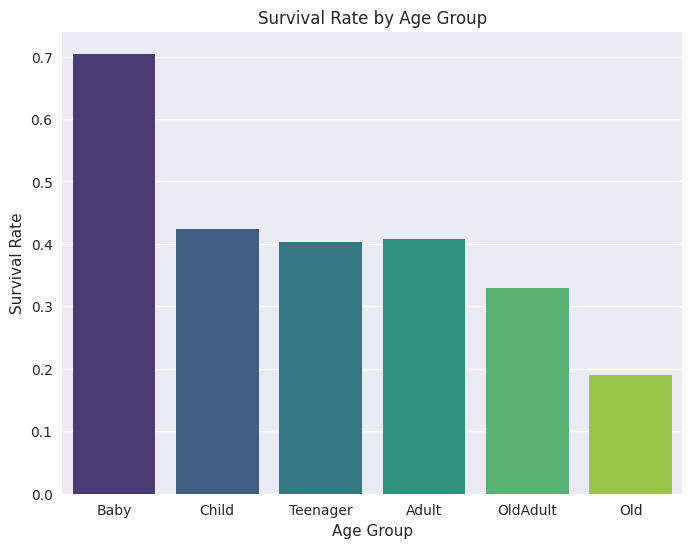

In [39]:
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=[0, 5, 14, 18, 30, 60, 100], labels=['Baby', 'Child', 'Teenager', 'Adult', 'OldAdult', 'Old'])
survival_by_age_group = train_df.groupby('AgeGroup')['Survived'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='Survived', data=train_df, ci=None, order=['Baby', 'Child', 'Teenager', 'Adult', 'OldAdult', 'Old'], palette='viridis')
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.show()

/tmp/ipykernel_36/1422888002.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_class_group = train_df.groupby('ClassGroup')['Survived'].mean()
/tmp/ipykernel_36/1422888002.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ClassGroup', y='Survived', data=train_df, ci=None, order=['Lux', 'Middle', 'Economy'], palette='viridis')
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


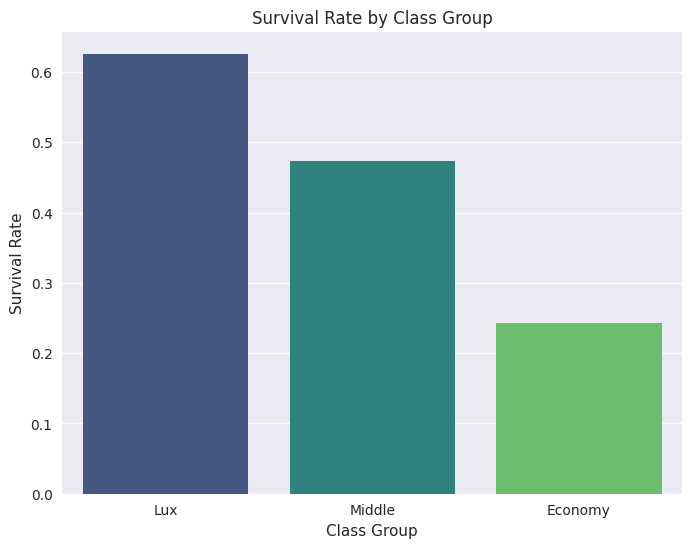

In [40]:
train_df['ClassGroup'] = pd.cut(train_df['Pclass'], bins=[0, 1, 2, 3], labels=['Lux', 'Middle', 'Economy'])
survival_by_class_group = train_df.groupby('ClassGroup')['Survived'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x='ClassGroup', y='Survived', data=train_df, ci=None, order=['Lux', 'Middle', 'Economy'], palette='viridis')
plt.title('Survival Rate by Class Group')
plt.ylabel('Survival Rate')
plt.xlabel('Class Group')
plt.show()

In [41]:
train_df

,PassengerId,Survived,Age,Fare,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,AgeGroup,ClassGroup
0,1,0,22.000000,7.2500,3,1,0,True,False,True,Adult,Economy
1,2,1,38.000000,71.2833,1,1,0,False,False,False,OldAdult,Lux
2,3,1,26.000000,7.9250,3,0,0,False,False,True,Adult,Economy
3,4,1,35.000000,53.1000,1,1,0,False,False,True,OldAdult,Lux
4,5,0,35.000000,8.0500,3,0,0,True,False,True,OldAdult,Economy
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.000000,13.0000,2,0,0,True,False,True,Adult,Middle
887,888,1,19.000000,30.0000,1,0,0,False,False,True,Adult,Lux
888,889,0,27.915709,23.4500,3,1,2,False,False,True,Adult,Economy
889,890,1,26.000000,30.0000,1,0,0,True,False,False,Adult,Lux


In [42]:
test_df

,PassengerId,Age,Fare,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,892,34.500000,7.8292,3,0,0,True,True,False
1,893,47.000000,7.0000,3,1,0,False,False,True
2,894,62.000000,9.6875,2,0,0,True,True,False
3,895,27.000000,8.6625,3,0,0,True,False,True
4,896,22.000000,12.2875,3,1,1,False,False,True
...,...,...,...,...,...,...,...,...,...
413,1305,30.272732,8.0500,3,0,0,True,False,True
414,1306,39.000000,108.9000,1,0,0,False,False,False
415,1307,38.500000,7.2500,3,0,0,True,False,True
416,1308,30.272732,8.0500,3,0,0,True,False,True


In [43]:
corr = train_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male','Embarked_Q', 'Embarked_S', 'Survived']].corr()
corr

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
Pclass,1.000000,-0.327009,0.081656,0.016824,-0.548193,0.127741,0.220558,0.076466,-0.335549
Age,-0.327009,1.000000,-0.236188,-0.181612,0.086114,0.108611,-0.018964,-0.017519,-0.085363
SibSp,0.081656,-0.236188,1.000000,0.414542,0.160887,-0.116348,-0.026692,0.069438,-0.034040
Parch,0.016824,-0.181612,0.414542,1.000000,0.217532,-0.247508,-0.081585,0.061512,0.083151
Fare,-0.548193,0.086114,0.160887,0.217532,1.000000,-0.179958,-0.116684,-0.163758,0.255290
Sex_male,0.127741,0.108611,-0.116348,-0.247508,-0.179958,1.000000,-0.075217,0.121405,-0.541585
Embarked_Q,0.220558,-0.018964,-0.026692,-0.081585,-0.116684,-0.075217,1.000000,-0.499261,0.004536
Embarked_S,0.076466,-0.017519,0.069438,0.061512,-0.163758,0.121405,-0.499261,1.000000,-0.151777
Survived,-0.335549,-0.085363,-0.034040,0.083151,0.255290,-0.541585,0.004536,-0.151777,1.000000


In [44]:
X_train = train_df.drop(columns=['Survived', 'AgeGroup', 'ClassGroup', 'PassengerId'])
y_train = train_df['Survived']

In [45]:
X_test = test_df.drop(columns=['PassengerId'])
y_test = gende_df.drop(columns=['PassengerId'])

In [46]:
all_result_dic = {}

start_time_default = time.time()

# Modeli oluşturun
model_default = RandomForestClassifier()

model_default.fit(X_train, y_train)

# Make predictions
predictions_default = model_default.predict(X_test)

accuracy_default = accuracy_score(y_test, predictions_default)

print(f'Default Accuracy: {accuracy_default:.5f}')

# Hesaplama yapılırken pozitif ve negatif değerlerin her iksisi de göz önüne alınır.
precision_default = precision_score(y_test, predictions_default, average='weighted')
print(f'Default Precision: {precision_default:.5f}')


recall_default = recall_score(y_test, predictions_default, average='weighted')
print(f'Optuna Recall: {recall_default:.5f}')

# F1 skoru
f1_default = f1_score(y_test, predictions_default, average='weighted')
print(f'Optuna F1 Score: {f1_default:.5f}')

end_time_default = time.time()

# Çalışma süresini hesapla
execution_time_default = end_time_default - start_time_default

print(f"Default çalışma süresi: {execution_time_default:.3f} saniye")

Default Accuracy: 0.78947
Default Precision: 0.78715
Optuna Recall: 0.78947
Optuna F1 Score: 0.78784
Default çalışma süresi: 0.337 saniye


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

start_time_grid_search = time.time()


# Define the model
model = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
  }

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

end_time_grid_search = time.time()

# Çalışma süresini hesapla
execution_time_grid_search = end_time_grid_search - start_time_grid_search

print(f"Grid Search çalışma süresi: {execution_time_grid_search:.3f} saniye")

Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Grid Search çalışma süresi: 67.306 saniye


In [48]:
# Use the best model
grid_search_model = grid_search.best_estimator_

# Make predictions
predictions_grid_search = grid_search_model.predict(X_test)

accuracy_grid_search = accuracy_score(y_test, predictions_grid_search)

print(f'Grid Search Accuracy: {accuracy_grid_search:.5f}')

# Hesaplama yapılırken pozitif ve negatif değerlerin her iksisi de göz önüne alınır.
precision_grid_search = precision_score(y_test, predictions_grid_search, average='weighted')
print(f'Grid Search Precision: {precision_grid_search:.5f}')


recall_grid_search = recall_score(y_test, predictions_grid_search, average='weighted')
print(f'Grid Search Recall: {recall_grid_search:.5f}')

# F1 skoru
f1_grid_search = f1_score(y_test, predictions_grid_search, average='weighted')
print(f'Grid Search F1 Score: {f1_grid_search:.5f}')

all_result_dic['Grid Search'] = [accuracy_grid_search, precision_grid_search, recall_grid_search, f1_grid_search, execution_time_grid_search]

Grid Search Accuracy: 0.83493
Grid Search Precision: 0.83423
Grid Search Recall: 0.83493
Grid Search F1 Score: 0.83124


In [49]:
import optuna

optuna.logging.set_verbosity(optuna.logging.WARNING)

start_time_optuna = time.time()

# Objective function for Optuna
def objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    # Create the RandomForest model with the hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=0
    )

    # Evaluate the model using cross-validation
    score = cross_val_score(model, X_train, y_train, cv=3 , scoring='accuracy').mean()
    return score

# Create a study and optimize it
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)


end_time_grid_optuna = time.time()

# Çalışma süresini hesapla
execution_time_optuna = end_time_grid_optuna - start_time_optuna

print(f"Optuna çalışma süresi: {execution_time_optuna:.3f} saniye")

Best hyperparameters: {'n_estimators': 128, 'max_depth': 19, 'min_samples_split': 13, 'min_samples_leaf': 5}
Optuna çalışma süresi: 50.010 saniye


In [50]:
# Use the best model
optuna_best_params = study.best_params

best_model_optuna = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
)

best_model_optuna.fit(X_train, y_train)

# Make predictions
predictions_optuna = best_model_optuna.predict(X_test)

accuracy_optuna = accuracy_score(y_test, predictions_optuna)

print(f'Optuna Accuracy: {accuracy_optuna:.5f}')

# Hesaplama yapılırken pozitif ve negatif değerlerin her iksisi de göz önüne alınır.
precision_optuna = precision_score(y_test, predictions_optuna, average='weighted')
print(f'Optuna Precision: {precision_optuna:.5f}')


recall_optuna = recall_score(y_test, predictions_optuna, average='weighted')
print(f'Optuna Recall: {recall_optuna:.5f}')

# F1 skoru
f1_optuna = f1_score(y_test, predictions_optuna, average='weighted')
print(f'Optuna F1 Score: {f1_optuna:.5f}')

all_result_dic['Optuna'] = [accuracy_optuna, precision_optuna, recall_optuna, f1_optuna, execution_time_optuna]

Optuna Accuracy: 0.83971
Optuna Precision: 0.83859
Optuna Recall: 0.83971
Optuna F1 Score: 0.83681


In [51]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

start_time_rand_search = time.time()

param_distributions = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 20)
}

random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_distributions, n_iter=50, cv=3)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_

end_time_rand_search = time.time()

# Çalışma süresini hesapla
execution_time_rand_search = end_time_rand_search - start_time_rand_search

print(f"Rand Search çalışma süresi: {execution_time_rand_search:.3f} saniye")

print(best_params)

Rand Search çalışma süresi: 234.372 saniye
{'max_depth': 14, 'min_samples_split': 6, 'n_estimators': 678}


In [52]:
# En iyi modeli elde etme
best_model_rand_search = random_search.best_estimator_

# Test verisi üzerinde tahmin yapma
predictions_rand_search = best_model_rand_search.predict(X_test)

# Sonuçları değerlendirme
accuracy_rand_search = accuracy_score(y_test, predictions_rand_search)
print(f'Rand Search Doğruluk Skoru: {accuracy_rand_search:.5f}')


precision_rand_search = precision_score(y_test, predictions_rand_search, average='weighted')
print(f'Rand Search Precision: {precision_rand_search:.5f}')


recall_rand_search = recall_score(y_test, predictions_rand_search, average='weighted')
print(f'Rand Search Recall: {recall_rand_search:.5f}')

# F1 skoru
f1_rand_search = f1_score(y_test, predictions_rand_search, average='weighted')
print(f'Rand Search F1 Score: {f1_rand_search:.5f}')

all_result_dic['Random Search'] = [accuracy_rand_search, precision_rand_search, recall_rand_search, f1_rand_search, execution_time_rand_search]

Rand Search Doğruluk Skoru: 0.83254
Rand Search Precision: 0.83123
Rand Search Recall: 0.83254
Rand Search F1 Score: 0.82933


In [53]:
from skopt import BayesSearchCV

start_time_bayes = time.time()

search_space = {
    'n_estimators': (100, 1000),
    'max_depth': (10, 50),
    'min_samples_split': (2, 20)
}


bayes_search = BayesSearchCV(estimator=RandomForestClassifier(), search_spaces=search_space, n_iter=50, cv=5)
bayes_search.fit(X_train, y_train)

best_params_bayes = bayes_search.best_params_

end_time_bayes = time.time()

# Çalışma süresini hesapla
execution_time_bayes_searc = end_time_bayes - start_time_bayes

print(f"Bayes çalışma süresi: {execution_time_bayes_searc} saniye")

print(best_params)

Bayes çalışma süresi: 496.2229483127594 saniye
{'max_depth': 14, 'min_samples_split': 6, 'n_estimators': 678}


In [54]:
# En iyi modeli elde etme
best_model_bayes = bayes_search.best_estimator_

# Test verisi üzerinde tahmin yapma
predictions_bayes = best_model_bayes.predict(X_test)

# Sonuçları değerlendirme
accuracy_bayes = accuracy_score(y_test, predictions_bayes)
print("Bayes Accuracy: ", accuracy_bayes)

precision_bayes = precision_score(y_test, predictions_bayes, average='weighted')
print(f'Bayes Precision: {precision_bayes:.5f}')


recall_bayes = recall_score(y_test, predictions_bayes, average='weighted')
print(f'Bayes Recall: {recall_bayes:.5f}')

# F1 skoru
f1_bayes = f1_score(y_test, predictions_bayes, average='weighted')
print(f'Bayes F1 Score: {f1_bayes:.5f}')

all_result_dic['Bayes'] = [accuracy_bayes, precision_bayes, recall_bayes, f1_bayes, execution_time_bayes_searc]

Bayes Accuracy:  0.8277511961722488
Bayes Precision: 0.82602
Bayes Recall: 0.82775
Bayes F1 Score: 0.82481


In [55]:
from hyperopt import fmin, tpe, hp, Trials
from hyperopt.pyll.base import scope

start_time_hyper = time.time()

def objective(params):
    # Convert float parameters to integers
    n_estimators = int(params['n_estimators'])
    max_depth = int(params['max_depth'])
    min_samples_split = int(params['min_samples_split'])
    
    clf = RandomForestClassifier(n_estimators=n_estimators,
                                 max_depth=max_depth,
                                 min_samples_split=min_samples_split)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    return -accuracy

space = {
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 10),
    'max_depth': hp.quniform('max_depth', 10, 50, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1)
}

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

end_time_hyper = time.time()

# Çalışma süresini hesapla
execution_time_hyper = end_time_hyper - start_time_hyper

print(f"Hyper çalışma süresi: {execution_time_hyper:.3f} saniye")

print(best)

100%|██████████| 50/50 [01:05<00:00,  1.30s/trial, best loss: -0.8516746411483254]
Hyper çalışma süresi: 65.034 saniye
{'max_depth': 31.0, 'min_samples_split': 19.0, 'n_estimators': 280.0}


In [56]:
# En iyi parametrelerle tekrar eğitip skoru almak
best_params_hyper = {
    'n_estimators': int(best['n_estimators']),
    'max_depth': int(best['max_depth']),
    'min_samples_split': int(best['min_samples_split'])
}

# En iyi parametrelerle model oluşturma
best_model_hyper = RandomForestClassifier(**best_params_hyper)
best_model_hyper.fit(X_train, y_train)

# Test setinde tahminler yapıp skoru hesaplama
predictions_hyper = best_model_hyper.predict(X_test)

# Sonuçları değerlendirme
accuracy_hyper = accuracy_score(y_test, predictions_hyper)
print("Hyper Accuracy: ", accuracy_hyper)

precision_hyper = precision_score(y_test, predictions_hyper, average='weighted')
print(f'Hyper Precision: {precision_hyper:.5f}')


recall_hyper = recall_score(y_test, predictions_hyper, average='weighted')
print(f'Hyper Recall: {recall_hyper:.5f}')

# F1 skoru
f1_hyper = f1_score(y_test, predictions_hyper, average='weighted')
print(f'Hyper F1 Score: {f1_hyper:.5f}')

all_result_dic['Hyper'] = [accuracy_hyper, precision_hyper, recall_hyper, f1_hyper, execution_time_hyper]

Hyper Accuracy:  0.8444976076555024
Hyper Precision: 0.84606
Hyper Recall: 0.84450
Hyper F1 Score: 0.83995


In [57]:
df_result = pd.DataFrame.from_dict(all_result_dic, orient='index', columns=['Mean Accuracy', 'Mean Precision', 'Mean Recall', 'Mean F1 Score', 'Execution Time'])
df_result

,Mean Accuracy,Mean Precision,Mean Recall,Mean F1 Score,Execution Time
Grid Search,0.834928,0.834227,0.834928,0.831237,67.306248
Optuna,0.839713,0.838594,0.839713,0.836809,50.009668
Random Search,0.832536,0.831226,0.832536,0.829329,234.371830
Bayes,0.827751,0.826022,0.827751,0.824807,496.222948
Hyper,0.844498,0.846064,0.844498,0.839950,65.033515


/tmp/ipykernel_36/1838971620.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


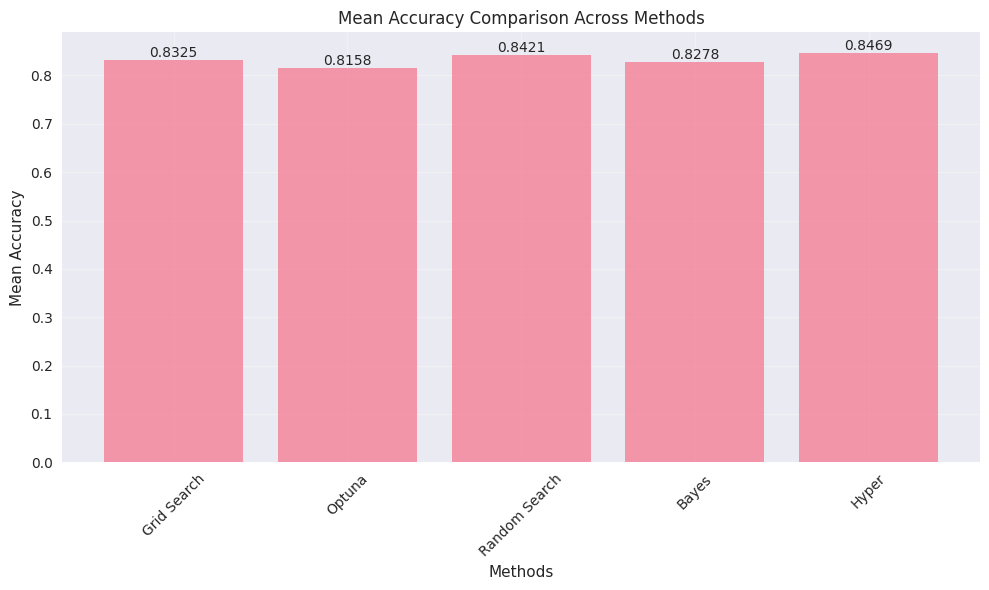

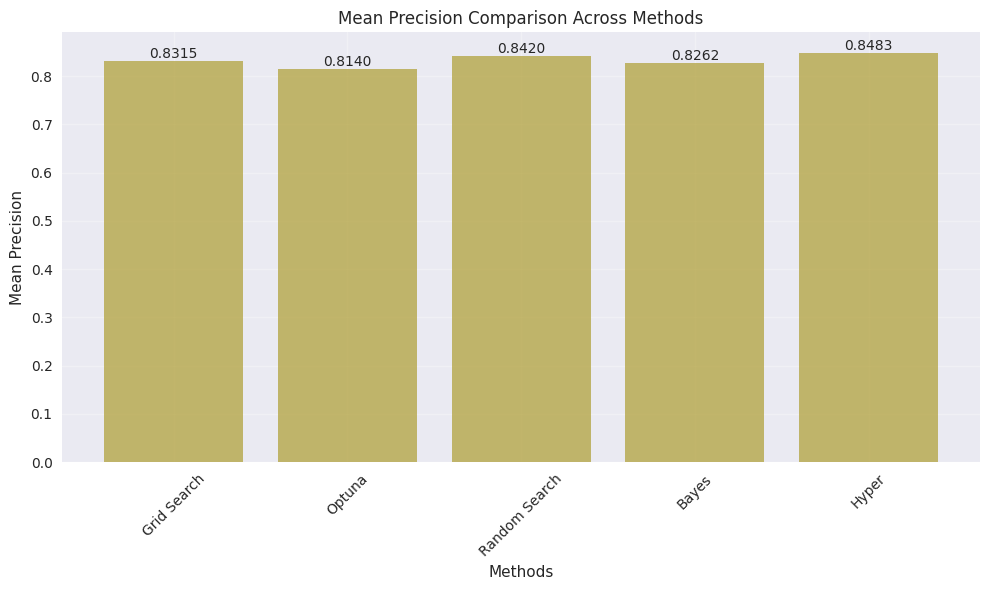

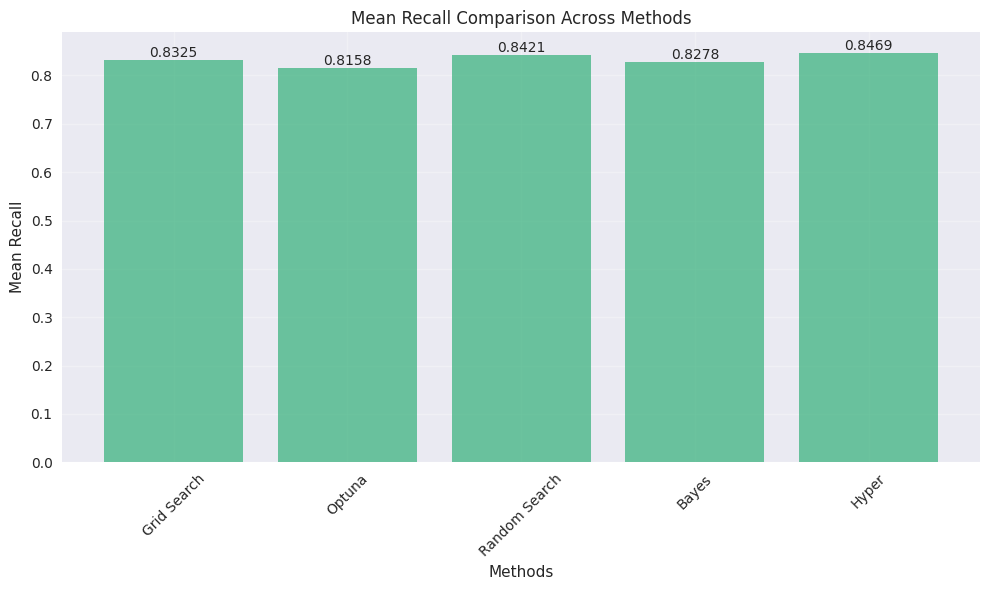

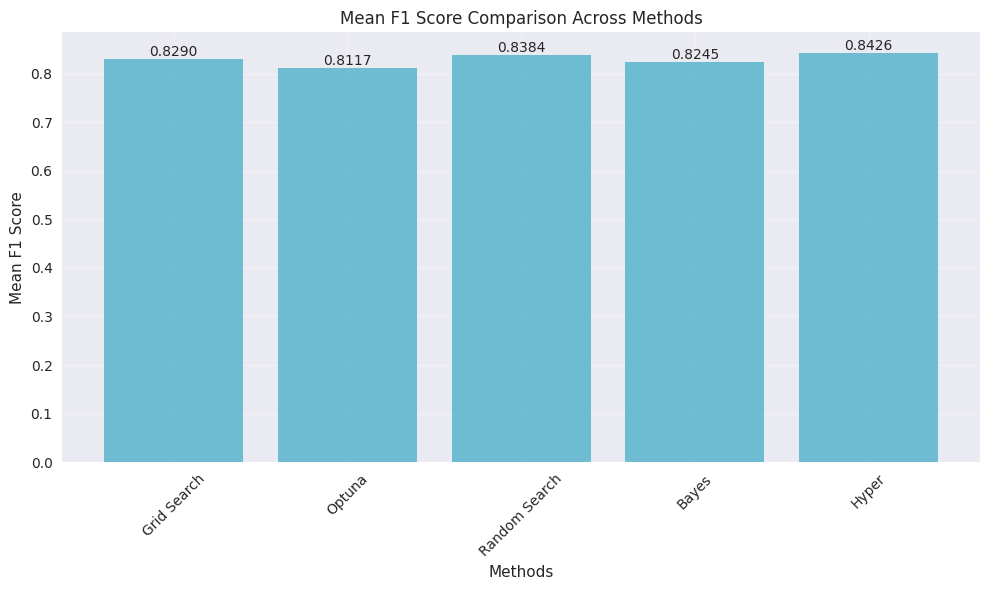

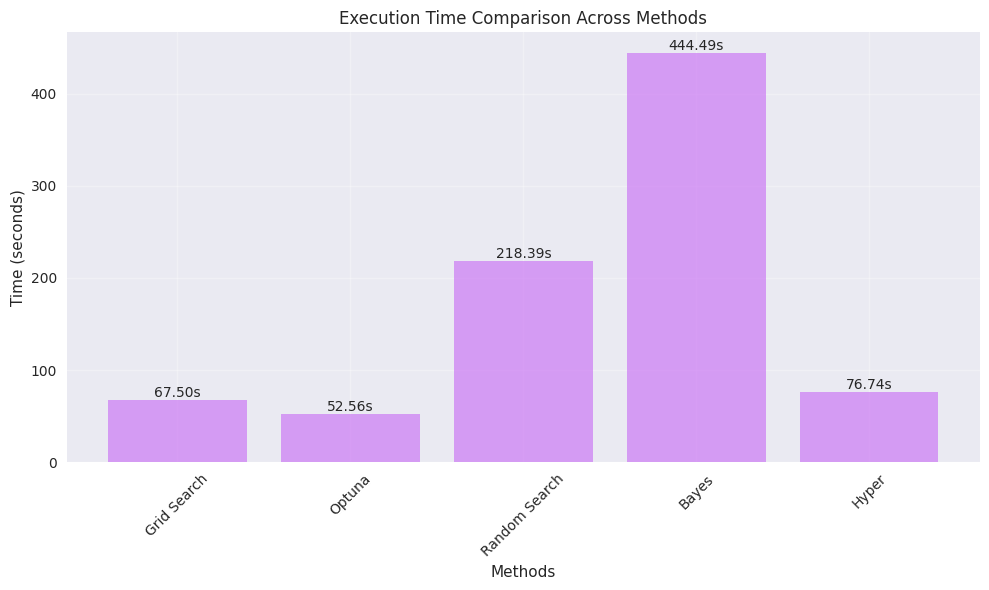

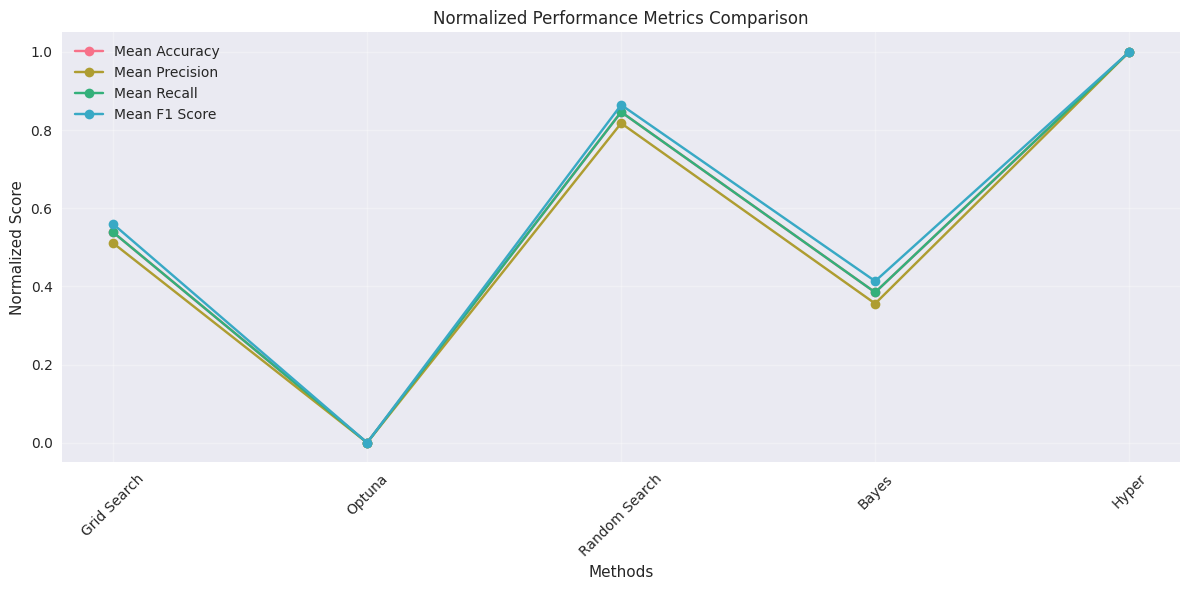

In [61]:
# Görsel stil ayarları
plt.style.use('seaborn')
colors = sns.color_palette("husl", 5)

# Her metrik için ayrı bir görselleştirme fonksiyonu
def plot_metric(df, metric_name, color_idx):
    plt.figure(figsize=(10, 6))
    
    # Bar plot
    bars = plt.bar(df.index, df[metric_name], color=colors[color_idx], alpha=0.7)
    
    # Değerleri çubukların üzerine yazma
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom')
    
    plt.title(f'{metric_name} Comparison Across Methods')
    plt.xlabel('Methods')
    plt.ylabel(metric_name)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    
    plt.tight_layout()
    plt.show()

# Her metrik için ayrı grafik
metrics = ['Mean Accuracy', 'Mean Precision', 'Mean Recall', 'Mean F1 Score']
for i, metric in enumerate(metrics):
    plot_metric(df_result, metric, i)

# Execution Time için ayrı bir görselleştirme
plt.figure(figsize=(10, 6))
bars = plt.bar(df_result.index, df_result['Execution Time'], color=colors[4], alpha=0.7)

# Değerleri çubukların üzerine yazma
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}s',
            ha='center', va='bottom')

plt.title('Execution Time Comparison Across Methods')
plt.xlabel('Methods')
plt.ylabel('Time (seconds)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

# Tüm metriklerin karşılaştırmalı analizi
plt.figure(figsize=(12, 6))
performance_metrics = df_result[metrics]
performance_metrics = (performance_metrics - performance_metrics.min()) / (performance_metrics.max() - performance_metrics.min())

for i, metric in enumerate(metrics):
    plt.plot(performance_metrics.index, performance_metrics[metric], 
            marker='o', label=metric, color=colors[i])

plt.title('Normalized Performance Metrics Comparison')
plt.xlabel('Methods')
plt.ylabel('Normalized Score')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()